In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from tesselation import hinter_sampling

In [87]:
pose = []
radio = 1.2
num_esferas =  [radio-radio*.3, radio, radio+radio*.3]
print("teselando ...")
for i in num_esferas:
    poses, _ = hinter_sampling(1000, radius = i)

    #Filter
    p = []
    for j in range (0,len(poses)):
        if poses[j,2] >= 0.0:
            p.append(poses[j])
    pose.append(p)

teselando ...


In [19]:
def visualiza_teselado(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Crea el subplot 3D 

    print(len(points))
    color = []
    points = np.asarray(points)
    for view in points:
        color.append('r')

    ax.scatter(points[:, 0],points[:, 1],points[:, 2], color=color, s=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

In [90]:
def visualiza_teselado_diccionario(lista_puntos, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colores = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    
    for i, points in enumerate(lista_puntos):
        points = np.asarray(points)
        color = colores[i % len(colores)]  

        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=color, s=1, label=f'Conjunto {i+1}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title(title)
    ax.legend()  # Muestra una leyenda con el índice de cada conjunto de puntos
    plt.show()

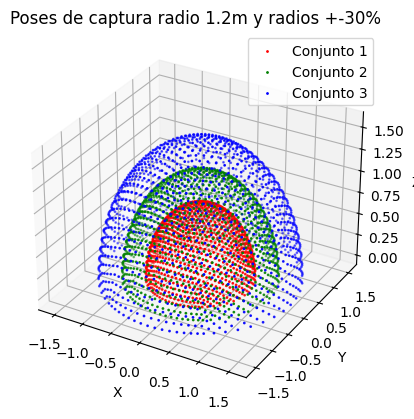

In [91]:
visualiza_teselado_diccionario(pose, 'Poses de captura radio 1.2m y radios +-30%')

In [92]:
arr = np.array(pose)
np.savez('esferas_v.npz', r = arr[0], r1 = arr[1], r2=arr[2])